## 0.Import Packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import os
import glob
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import math

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN, Dropout
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import model_from_json
from keras import optimizers

## 1. Load Dataset

In [4]:
dir = 'refined_dataset'
listdir = os.listdir(dir)

print(listdir)
print("The number of dataset :", len(listdir))

['B05_discharge_soh.csv', 'B07_discharge_soh.csv', 'B18_discharge_soh.csv', 'B33_discharge_soh.csv', 'B34_discharge_soh.csv', 'B46_discharge_soh.csv', 'B47_discharge_soh.csv', 'B48_discharge_soh.csv']
The number of dataset : 8


In [5]:
num = ['B05', 'B07', 'B18', 'B33', 'B34', 'B46', 'B47', 'B48']
for i in range(len(listdir)):
    vector = np.zeros((1,3))
    path = os.path.join(os.getcwd(), 'refined_dataset/', num[i] + '_discharge_soh.csv')
    csv = pd.read_csv(path)
    df = pd.DataFrame(csv)
    
    vec = df[['cycle', 'capacity', 'SOH']]
    
    globals()['data_{}'.format(num[i])] = vec

In [6]:
data = pd.read_csv('refined_dataset/B05_discharge_soh.csv')
df = pd.DataFrame(data)
df

,terminal_voltage,terminal_current,temperature,charge_current,charge_voltage,time,capacity,cycle,SOH
0,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1.856487,1,0.928244
1,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1.856487,1,0.928244
2,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1.856487,1,0.928244
3,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1.856487,1,0.928244
4,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,1.856487,1,0.928244
...,...,...,...,...,...,...,...,...,...
50280,3.579262,-0.001569,34.864823,0.0006,0.000,2781.312,1.325079,168,0.662540
50281,3.581964,-0.003067,34.814770,0.0006,0.000,2791.062,1.325079,168,0.662540
50282,3.584484,-0.003079,34.676258,0.0006,0.000,2800.828,1.325079,168,0.662540
50283,3.587336,0.001219,34.565580,0.0006,0.000,2810.640,1.325079,168,0.662540


,terminal_voltage,terminal_current,temperature,charge_current,charge_voltage,time,capacity,cycle,SOH
0,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1.856487,1,0.928244
1,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1.856487,1,0.928244
2,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1.856487,1,0.928244
3,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1.856487,1,0.928244
4,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,1.856487,1,0.928244



Training LinearRegression...
LinearRegression - Train R2: 1.0000, Test R2: 1.0000, Train Adjusted R2: 1.0000, Test Adjusted R2: 1.0000

Training Ridge...
Ridge - Train R2: 1.0000, Test R2: 1.0000, Train Adjusted R2: 1.0000, Test Adjusted R2: 1.0000

Training Lasso...
Lasso - Train R2: 1.0000, Test R2: 1.0000, Train Adjusted R2: 1.0000, Test Adjusted R2: 1.0000

Training ElasticNet...
ElasticNet - Train R2: 1.0000, Test R2: 1.0000, Train Adjusted R2: 1.0000, Test Adjusted R2: 1.0000

Training DecisionTree...
DecisionTree - Train R2: 1.0000, Test R2: 1.0000, Train Adjusted R2: 1.0000, Test Adjusted R2: 1.0000

Training RandomForest...
RandomForest - Train R2: 1.0000, Test R2: 1.0000, Train Adjusted R2: 1.0000, Test Adjusted R2: 1.0000

Training GradientBoosting...
GradientBoosting - Train R2: 1.0000, Test R2: 1.0000, Train Adjusted R2: 1.0000, Test Adjusted R2: 1.0000

Training KNeighbors...
KNeighbors - Train R2: 0.9999, Test R2: 0.9998, Train Adjusted R2: 0.9999, Test Adjusted R2: 0.9

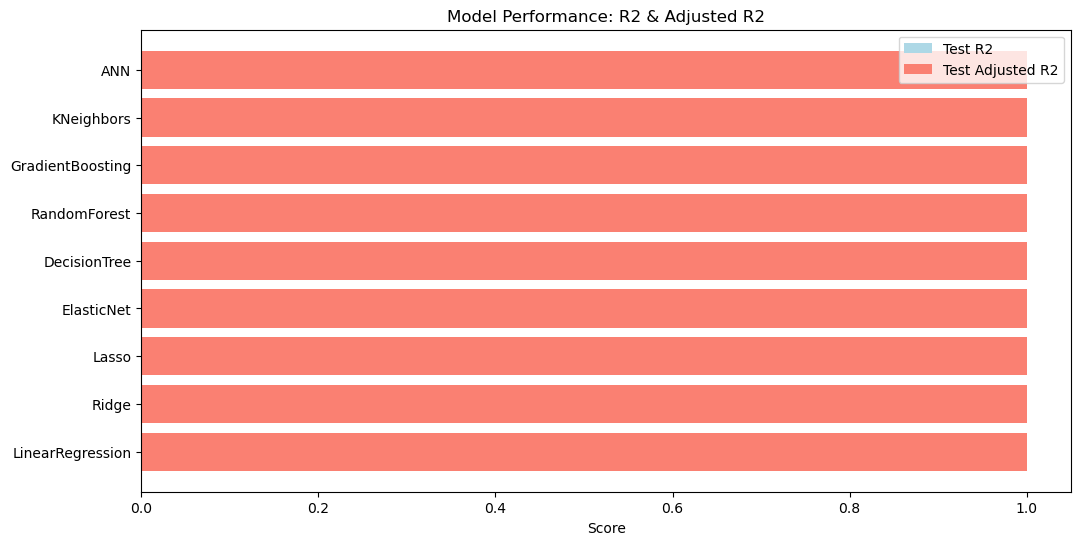

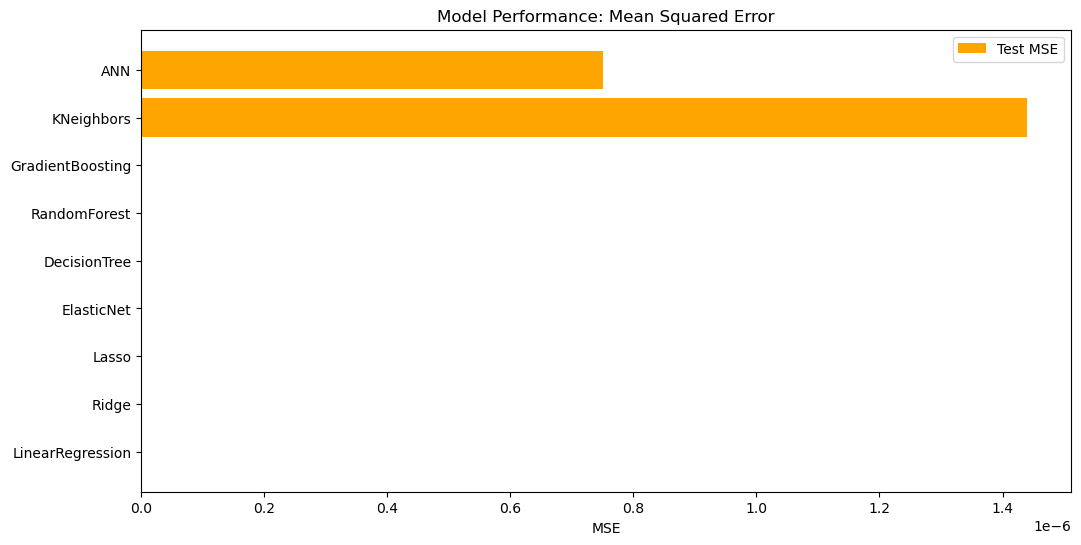

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from scipy.stats import randint
import warnings
warnings.filterwarnings("ignore")
# Load the data
# data = pd.read_csv('refined_dataset/B05_discharge_soh.csv')
# df = pd.DataFrame(data)

# Display first few rows of the dataset
display(df.head())

# Features and target variable
X = df.drop('SOH', axis=1)
y = df['SOH']

# Shuffle and split data into train and test sets
X, y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models and hyperparameters
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "KNeighbors": KNeighborsRegressor()
}

# Hyperparameter tuning using RandomizedSearchCV
param_grids = {
    "LinearRegression": {'fit_intercept': [True, False]},
    "Ridge": {'alpha': np.logspace(-6, 6, 13)},
    "Lasso": {'alpha': np.logspace(-6, 6, 13)},
    "ElasticNet": {'alpha': np.logspace(-6, 6, 13), 'l1_ratio': np.linspace(0, 1, 10)},
    "DecisionTree": {'max_depth': randint(1, 20), 'min_samples_split': randint(2, 20)},
    "RandomForest": {'n_estimators': randint(100, 1000), 'max_depth': randint(10, 50), 'min_samples_split': randint(2, 10)},
    "GradientBoosting": {'n_estimators': randint(100, 1000), 'max_depth': randint(3, 10), 'learning_rate': np.logspace(-3, 0, 4)},
    "KNeighbors": {'n_neighbors': randint(1, 20)}
}

# Evaluate the models
def evaluate_models(X_train, y_train, X_test, y_test):
    results = {}
    for model_name, model in models.items():
        print(f"\nTraining {model_name}...")
        
        # Hyperparameter tuning using RandomizedSearchCV
        randomized_search = RandomizedSearchCV(model, param_distributions=param_grids[model_name], n_iter=10, random_state=42, n_jobs=-1)
        randomized_search.fit(X_train, y_train)
        
        # Best model from RandomizedSearchCV
        best_model = randomized_search.best_estimator_
        
        # Predict using the best model
        y_pred_train = best_model.predict(X_train)
        y_pred_test = best_model.predict(X_test)
        
        # Calculate metrics
        r2_train = r2_score(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)
        adjusted_r2_train = 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
        adjusted_r2_test = 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
        mse_train = mean_squared_error(y_train, y_pred_train)
        mse_test = mean_squared_error(y_test, y_pred_test)
        
        results[model_name] = {
            'Best Params': randomized_search.best_params_,
            'Train R2': r2_train,
            'Test R2': r2_test,
            'Train Adjusted R2': adjusted_r2_train,
            'Test Adjusted R2': adjusted_r2_test,
            'Train MSE': mse_train,
            'Test MSE': mse_test
        }
        
        print(f"{model_name} - Train R2: {r2_train:.4f}, Test R2: {r2_test:.4f}, Train Adjusted R2: {adjusted_r2_train:.4f}, Test Adjusted R2: {adjusted_r2_test:.4f}")
    
    return results

# Function to create and evaluate an ANN model
def train_ann(X_train, y_train, X_test, y_test):
    ann_model = Sequential()
    ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    ann_model.add(Dense(32, activation='relu'))
    ann_model.add(Dense(1))
    
    ann_model.compile(optimizer=Adam(), loss='mean_squared_error')
    
    # Train ANN model
    ann_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    
    # Predict with ANN model
    y_pred_train = ann_model.predict(X_train)
    y_pred_test = ann_model.predict(X_test)
    
    # Metrics for ANN
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    adjusted_r2_train = 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
    adjusted_r2_test = 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    
    ann_results = {
        'Train R2': r2_train,
        'Test R2': r2_test,
        'Train Adjusted R2': adjusted_r2_train,
        'Test Adjusted R2': adjusted_r2_test,
        'Train MSE': mse_train,
        'Test MSE': mse_test
    }
    
    print(f"\nANN - Train R2: {r2_train:.4f}, Test R2: {r2_test:.4f}, Train Adjusted R2: {adjusted_r2_train:.4f}, Test Adjusted R2: {adjusted_r2_test:.4f}")
    
    return ann_results

# Combine results
def plot_metrics(results, ann_results):
    model_names = list(results.keys()) + ['ANN']
    r2_test = [results[model]['Test R2'] for model in results] + [ann_results['Test R2']]
    adjusted_r2_test = [results[model]['Test Adjusted R2'] for model in results] + [ann_results['Test Adjusted R2']]
    mse_test = [results[model]['Test MSE'] for model in results] + [ann_results['Test MSE']]

    # Plot R2 and Adjusted R2
    plt.figure(figsize=(12, 6))
    plt.barh(model_names, r2_test, color='lightblue', label='Test R2')
    plt.barh(model_names, adjusted_r2_test, color='salmon', label='Test Adjusted R2')
    plt.xlabel('Score')
    plt.title('Model Performance: R2 & Adjusted R2')
    plt.legend()
    plt.show()

    # Plot MSE
    plt.figure(figsize=(12, 6))
    plt.barh(model_names, mse_test, color='orange', label='Test MSE')
    plt.xlabel('MSE')
    plt.title('Model Performance: Mean Squared Error')
    plt.legend()
    plt.show()

# Train and evaluate models
results = evaluate_models(X_train_scaled, y_train, X_test_scaled, y_test)

# Train and evaluate the ANN model
ann_results = train_ann(X_train_scaled, y_train, X_test_scaled, y_test)

# Combine results and plot
plot_metrics(results, ann_results)



,terminal_voltage,terminal_current,temperature,charge_current,charge_voltage,time,capacity,cycle,SOH
0,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1.856487,1,0.928244
1,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1.856487,1,0.928244
2,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1.856487,1,0.928244
3,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1.856487,1,0.928244
4,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,1.856487,1,0.928244



Training LinearRegression...
LinearRegression - Train R2: 1.0000, Test R2: 1.0000, Train Adjusted R2: 1.0000, Test Adjusted R2: 1.0000, Train MSE: 0.0000, Test MSE: 0.0000, Train MAE: 0.0000, Test MAE: 0.0000, Train RMSE: 0.0000, Test RMSE: 0.0000

Training Ridge...
Ridge - Train R2: 1.0000, Test R2: 1.0000, Train Adjusted R2: 1.0000, Test Adjusted R2: 1.0000, Train MSE: 0.0000, Test MSE: 0.0000, Train MAE: 0.0000, Test MAE: 0.0000, Train RMSE: 0.0000, Test RMSE: 0.0000

Training Lasso...
Lasso - Train R2: 1.0000, Test R2: 1.0000, Train Adjusted R2: 1.0000, Test Adjusted R2: 1.0000, Train MSE: 0.0000, Test MSE: 0.0000, Train MAE: 0.0000, Test MAE: 0.0000, Train RMSE: 0.0000, Test RMSE: 0.0000

Training ElasticNet...
ElasticNet - Train R2: 1.0000, Test R2: 1.0000, Train Adjusted R2: 1.0000, Test Adjusted R2: 1.0000, Train MSE: 0.0000, Test MSE: 0.0000, Train MAE: 0.0000, Test MAE: 0.0000, Train RMSE: 0.0000, Test RMSE: 0.0000

Training DecisionTree...
DecisionTree - Train R2: 1.0000, T

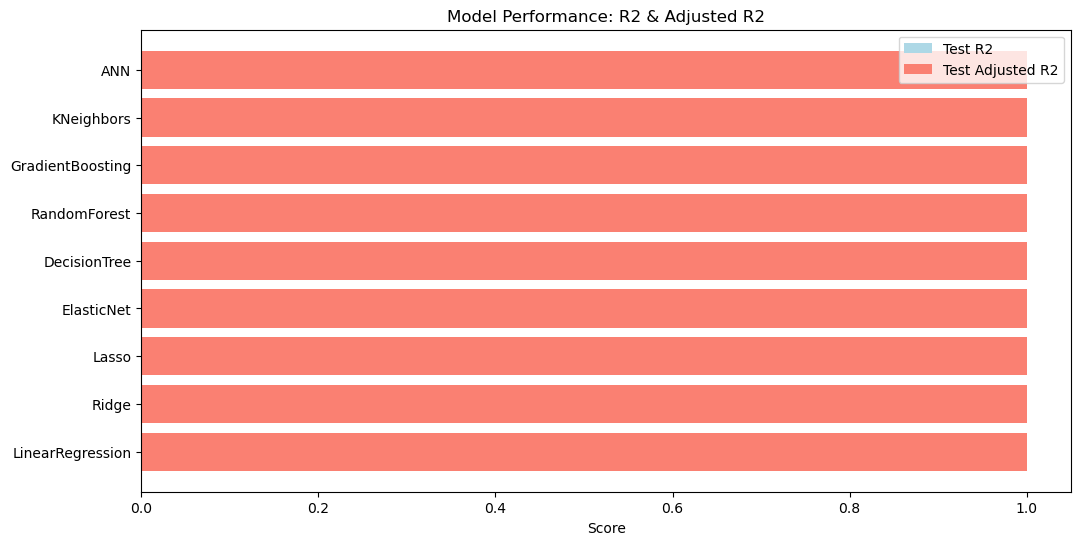

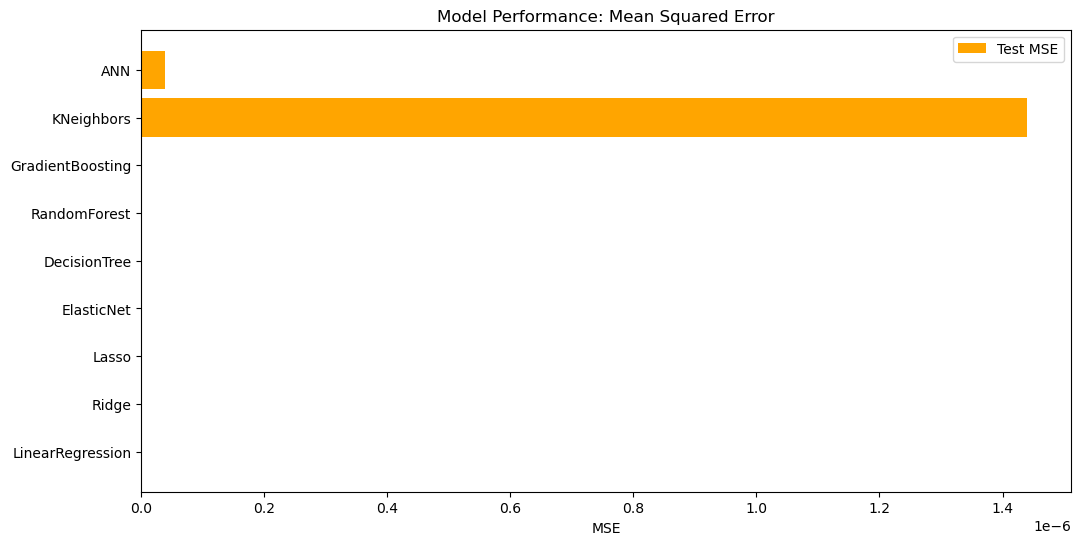

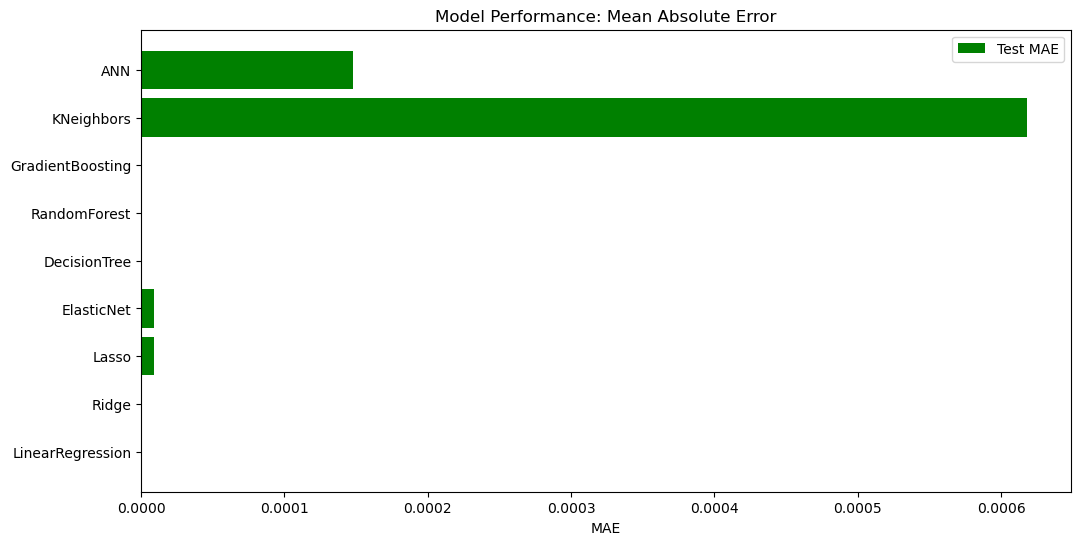

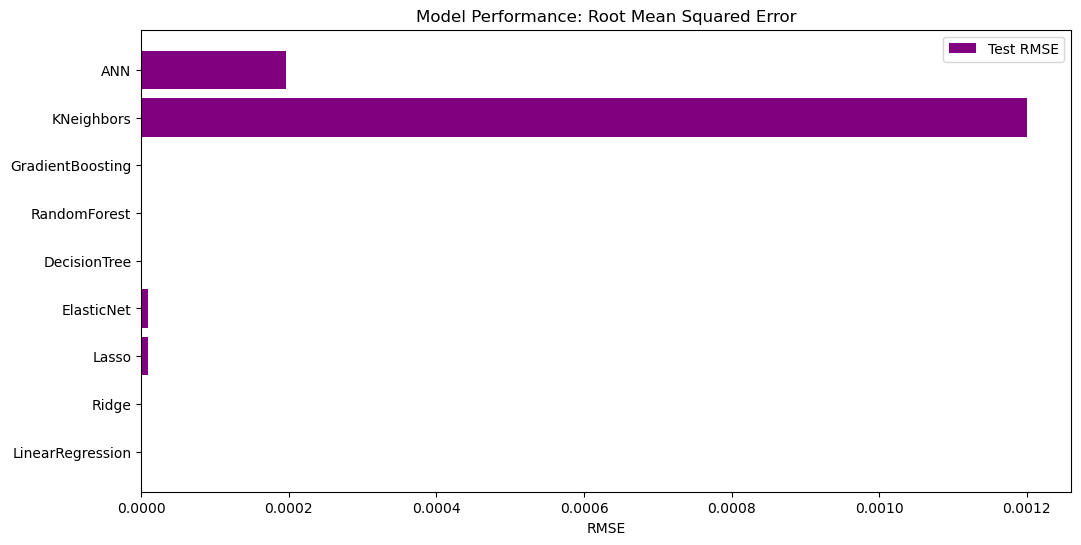

AttributeError: 'dict' object has no attribute 'predict'

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from scipy.stats import randint
import joblib
import warnings
warnings.filterwarnings("ignore")

# Load the data
# data = pd.read_csv('refined_dataset/B05_discharge_soh.csv')
# df = pd.DataFrame(data)

# Display first few rows of the dataset
display(df.head())

# Features and target variable
X = df.drop('SOH', axis=1)
y = df['SOH']

# Shuffle and split data into train and test sets
X, y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models and hyperparameters
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "KNeighbors": KNeighborsRegressor()
}

# Hyperparameter tuning using RandomizedSearchCV
param_grids = {
    "LinearRegression": {'fit_intercept': [True, False]},
    "Ridge": {'alpha': np.logspace(-6, 6, 13)},
    "Lasso": {'alpha': np.logspace(-6, 6, 13)},
    "ElasticNet": {'alpha': np.logspace(-6, 6, 13), 'l1_ratio': np.linspace(0, 1, 10)},
    "DecisionTree": {'max_depth': randint(1, 20), 'min_samples_split': randint(2, 20)},
    "RandomForest": {'n_estimators': randint(100, 1000), 'max_depth': randint(10, 50), 'min_samples_split': randint(2, 10)},
    "GradientBoosting": {'n_estimators': randint(100, 1000), 'max_depth': randint(3, 10), 'learning_rate': np.logspace(-3, 0, 4)},
    "KNeighbors": {'n_neighbors': randint(1, 20)}
}

# Evaluate the models
def evaluate_models(X_train, y_train, X_test, y_test):
    results = {}
    for model_name, model in models.items():
        print(f"\nTraining {model_name}...")
        
        # Hyperparameter tuning using RandomizedSearchCV
        randomized_search = RandomizedSearchCV(model, param_distributions=param_grids[model_name], n_iter=10, random_state=42, n_jobs=-1)
        randomized_search.fit(X_train, y_train)
        
        # Best model from RandomizedSearchCV
        best_model = randomized_search.best_estimator_
        
        # Predict using the best model
        y_pred_train = best_model.predict(X_train)
        y_pred_test = best_model.predict(X_test)
        
        # Calculate metrics
        r2_train = r2_score(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)
        adjusted_r2_train = 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
        adjusted_r2_test = 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
        mse_train = mean_squared_error(y_train, y_pred_train)
        mse_test = mean_squared_error(y_test, y_pred_test)
        mae_train = mean_absolute_error(y_train, y_pred_train)
        mae_test = mean_absolute_error(y_test, y_pred_test)
        rmse_train = np.sqrt(mse_train)
        rmse_test = np.sqrt(mse_test)
        
        results[model_name] = {
            'Best Params': randomized_search.best_params_,
            'Train R2': r2_train,
            'Test R2': r2_test,
            'Train Adjusted R2': adjusted_r2_train,
            'Test Adjusted R2': adjusted_r2_test,
            'Train MSE': mse_train,
            'Test MSE': mse_test,
            'Train MAE': mae_train,
            'Test MAE': mae_test,
            'Train RMSE': rmse_train,
            'Test RMSE': rmse_test
        }
        
        print(f"{model_name} - Train R2: {r2_train:.4f}, Test R2: {r2_test:.4f}, Train Adjusted R2: {adjusted_r2_train:.4f}, Test Adjusted R2: {adjusted_r2_test:.4f}, Train MSE: {mse_train:.4f}, Test MSE: {mse_test:.4f}, Train MAE: {mae_train:.4f}, Test MAE: {mae_test:.4f}, Train RMSE: {rmse_train:.4f}, Test RMSE: {rmse_test:.4f}")
    
    return results

# Function to create and evaluate an ANN model
def train_ann(X_train, y_train, X_test, y_test):
    ann_model = Sequential()
    ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    ann_model.add(Dense(32, activation='relu'))
    ann_model.add(Dense(1))
    
    ann_model.compile(optimizer=Adam(), loss='mean_squared_error')
    
    # Train ANN model
    ann_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    
    # Predict with ANN model
    y_pred_train = ann_model.predict(X_train)
    y_pred_test = ann_model.predict(X_test)
    
    # Metrics for ANN
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    adjusted_r2_train = 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
    adjusted_r2_test = 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    
    ann_results = {
        'Train R2': r2_train,
        'Test R2': r2_test,
        'Train Adjusted R2': adjusted_r2_train,
        'Test Adjusted R2': adjusted_r2_test,
        'Train MSE': mse_train,
        'Test MSE': mse_test,
        'Train MAE': mae_train,
        'Test MAE': mae_test,
        'Train RMSE': rmse_train,
        'Test RMSE': rmse_test
    }
    
    print(f"\nANN - Train R2: {r2_train:.4f}, Test R2: {r2_test:.4f}, Train Adjusted R2: {adjusted_r2_train:.4f}, Test Adjusted R2: {adjusted_r2_test:.4f}, Train MSE: {mse_train:.4f}, Test MSE: {mse_test:.4f}, Train MAE: {mae_train:.4f}, Test MAE: {mae_test:.4f}, Train RMSE: {rmse_train:.4f}, Test RMSE: {rmse_test:.4f}")
    
    return ann_results

# Combine results
def plot_metrics(results, ann_results):
    model_names = list(results.keys()) + ['ANN']
    r2_test = [results[model]['Test R2'] for model in results] + [ann_results['Test R2']]
    adjusted_r2_test = [results[model]['Test Adjusted R2'] for model in results] + [ann_results['Test Adjusted R2']]
    mse_test = [results[model]['Test MSE'] for model in results] + [ann_results['Test MSE']]
    mae_test = [results[model]['Test MAE'] for model in results] + [ann_results['Test MAE']]
    rmse_test = [results[model]['Test RMSE'] for model in results] + [ann_results['Test RMSE']]

    # Plot R2 and Adjusted R2
    plt.figure(figsize=(12, 6))
    plt.barh(model_names, r2_test, color='lightblue', label='Test R2')
    plt.barh(model_names, adjusted_r2_test, color='salmon', label='Test Adjusted R2')
    plt.xlabel('Score')
    plt.title('Model Performance: R2 & Adjusted R2')
    plt.legend()
    plt.show()

    # Plot MSE
    plt.figure(figsize=(12, 6))
    plt.barh(model_names, mse_test, color='orange', label='Test MSE')
    plt.xlabel('MSE')
    plt.title('Model Performance: Mean Squared Error')
    plt.legend()
    plt.show()

    # Plot MAE
    plt.figure(figsize=(12, 6))
    plt.barh(model_names, mae_test, color='green', label='Test MAE')
    plt.xlabel('MAE')
    plt.title('Model Performance: Mean Absolute Error')
    plt.legend()
    plt.show()

    # Plot RMSE
    plt.figure(figsize=(12, 6))
    plt.barh(model_names, rmse_test, color='purple', label='Test RMSE')
    plt.xlabel('RMSE')
    plt.title('Model Performance: Root Mean Squared Error')
    plt.legend()
    plt.show()

# Evaluate models
results = evaluate_models(X_train_scaled, y_train, X_test_scaled, y_test)

# Train and evaluate ANN model
ann_results = train_ann(X_train_scaled, y_train, X_test_scaled, y_test)

# Combine results and plot
plot_metrics(results, ann_results)

# Save the best model (RandomForest example)
best_model = results['RandomForest']['Best Params']
joblib.dump(best_model, 'best_model.pkl')

# Inference method
def load_and_infer_model(model_path, test_sample):
    loaded_model = joblib.load(model_path)
    prediction = loaded_model.predict([test_sample])
    print(f"Predicted SOH for the test sample using loaded model: {prediction[0]}")
    return prediction[0]

# Example usage for inference
test_sample = X_test_scaled[0]  # Use the first test sample
predicted_soh = load_and_infer_model('best_model.pkl', test_sample)


In [12]:
import pandas as pd
import numpy as np
import joblib
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load and preprocess data
# df = pd.read_csv('refined_dataset/B05_discharge_soh.csv')  # Uncomment and update with your dataset path
# Display first few rows
display(df.head())

# Features and target variable
X = df.drop('SOH', axis=1)
y = df['SOH']

# Shuffle and split data
X, y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Save the trained model
joblib.dump(model, 'best_model.pkl')

# Function for inference
def load_and_infer_model(model_path, test_sample):
    # Load the trained model
    loaded_model = joblib.load(model_path)
    # Predict the SOH for the test sample
    prediction = loaded_model.predict([test_sample])
    print(f"Predicted SOH for the test sample using loaded model: {prediction[0]}")
    return prediction[0]

# Example usage
test_sample = X_test_scaled[0]  # Use the first test sample
predicted_soh = load_and_infer_model('best_model.pkl', test_sample)
print(f"\nGround Truth SOH: {y_test.iloc[0]}")
print(f"\nPredicted SOH: {predicted_soh}")


,terminal_voltage,terminal_current,temperature,charge_current,charge_voltage,time,capacity,cycle,SOH
0,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1.856487,1,0.928244
1,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1.856487,1,0.928244
2,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1.856487,1,0.928244
3,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1.856487,1,0.928244
4,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,1.856487,1,0.928244


Predicted SOH for the test sample using loaded model: 0.8865188780000028

Ground Truth SOH: 0.886518878

Predicted SOH: 0.8865188780000028


In [13]:
import pandas as pd
import numpy as np
import joblib
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import platform
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Load and preprocess data
# df = pd.read_csv('refined_dataset/B05_discharge_soh.csv')

# Features and target variable
X = df.drop('SOH', axis=1)
y = df['SOH']

# Shuffle and split data
X, y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Save the trained model (for reference)
joblib.dump(model, 'SOH_best_model.pkl')

# Convert to ONNX
initial_type = [('float_input', FloatTensorType([None, X_train_scaled.shape[1]]))] # Pass in number of input parameters
onnx_model = convert_sklearn(model, initial_types=initial_type)

with open("SOH_best_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())
print("ONNX model saved to SOH_best_model.onnx")

ONNX model saved to SOH_best_model.onnx


In [14]:
import pandas as pd
import numpy as np
import joblib
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import platform
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
import json

# Load and preprocess data
df = pd.read_csv('refined_dataset/B05_discharge_soh.csv')

# Features and target variable
X = df.drop('SOH', axis=1)
y = df['SOH']

# Shuffle and split data
X, y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Save the trained model (for reference)
joblib.dump(model, 'SOH_best_model.pkl')

# Convert to ONNX
initial_type = [('float_input', FloatTensorType([None, X_train_scaled.shape[1]]))]
onnx_model = convert_sklearn(model, initial_types=initial_type)

with open("SOH_best_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())
print("ONNX model saved to SOH_best_model.onnx")

# Save scaler parameters to JSON
scaler_params = {
    'mean': scaler.mean_.tolist(),
    'std': scaler.scale_.tolist() # Note: using scale_ instead of std_
}

with open("scaler_params.json", "w") as f:
    json.dump(scaler_params, f)
print("Scaler parameters saved to scaler_params.json")

ONNX model saved to SOH_best_model.onnx
Scaler parameters saved to scaler_params.json


In [19]:
import pandas as pd
import numpy as np
import joblib
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import platform
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
import json

# Load and preprocess data
df = pd.read_csv('refined_dataset/B05_discharge_soh.csv')

# Features and target variable
X = df.drop('SOH', axis=1)
y = df['SOH']

# Shuffle and split data
X, y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Save the trained model (for reference)
joblib.dump(model, 'SOH_best_model.pkl')

# Convert to ONNX
initial_type = [('float_input', FloatTensorType([None, X_train_scaled.shape[1]]))]
onnx_model = convert_sklearn(model, initial_types=initial_type)

with open("SOH_best_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())
print("ONNX model saved to SOH_best_model.onnx")

# Save scaler parameters to TXT
mean_values = scaler.mean_.tolist()
std_values = scaler.scale_.tolist()

with open("scaler_params.txt", "w") as f:
    f.write("Mean Values:\n")
    f.write(" ".join(map(str, mean_values)) + "\n")
    f.write("Standard Deviation Values:\n")
    f.write(" ".join(map(str, std_values)) + "\n")
    
print("Scaler parameters saved to scaler_params.txt")

ONNX model saved to SOH_best_model.onnx
Scaler parameters saved to scaler_params.txt


In [20]:
import onnx

# Load the ONNX model
model = onnx.load("SOH_best_model.onnx")

# Print input names
print("Input names:")
for input in model.graph.input:
    print(input.name)

# Print output names
print("Output names:")
for output in model.graph.output:
    print(output.name)

Input names:
float_input
Output names:
variable


In [18]:
X_train.iloc[0]

terminal_voltage       3.443567
terminal_current      -2.010116
temperature           34.197394
charge_current         1.998000
charge_voltage         2.476000
time                1733.859000
capacity               1.485868
cycle                100.000000
Name: 29224, dtype: float64

In [5]:
data_B05  ## result

,cycle,capacity,SOH
0,1,1.856487,0.928244
1,1,1.856487,0.928244
2,1,1.856487,0.928244
3,1,1.856487,0.928244
4,1,1.856487,0.928244
...,...,...,...
50280,168,1.325079,0.662540
50281,168,1.325079,0.662540
50282,168,1.325079,0.662540
50283,168,1.325079,0.662540


In [7]:
for i in range(len(listdir)):
    print("Shape of data :", np.shape(globals()['data_{}'.format(num[i])]))

Shape of data : (50285, 3)
Shape of data : (50285, 3)
Shape of data : (34866, 3)
Shape of data : (42200, 3)
Shape of data : (45909, 3)
Shape of data : (23478, 3)
Shape of data : (23478, 3)
Shape of data : (23478, 3)


In [255]:
print(listdir)
dataset = data_B48["SOH"]
cycle = data_B48['cycle']

dataset = np.array(dataset)
dataset = dataset.reshape((len(dataset),1))
dataset.shape

['B05_discharge_soh.csv', 'B07_discharge_soh.csv', 'B18_discharge_soh.csv', 'B33_discharge_soh.csv', 'B34_discharge_soh.csv', 'B46_discharge_soh.csv', 'B47_discharge_soh.csv', 'B48_discharge_soh.csv']


(23478, 1)

## 2. Split train and test dataset

In [256]:
train_size = int(len(dataset) * 0.5)
# train_size = int(len(dataset) * 0.5)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

11739 11739


In [257]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [258]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

11738
11738


In [259]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print(trainX.shape)
print(testX.shape)

(11738, 1, 1)
(11738, 1, 1)


## 3. Training with LSTM

In [260]:
model = Sequential()
model.add(LSTM(64, input_shape=(trainX.shape[1], trainX.shape[2])))

model.add(Dense(1))

model.compile(loss='mae', optimizer='adam')

In [261]:
history = model.fit(trainX, trainY, epochs=100, batch_size=20, validation_data=(testX, testY), verbose=1, shuffle = False)

Epoch 1/100
587/587 [==============================] - 1s 2ms/step - loss: 0.0619 - val_loss: 0.0083
Epoch 2/100
587/587 [==============================] - 1s 2ms/step - loss: 0.0036 - val_loss: 0.0086
Epoch 3/100
587/587 [==============================] - 1s 2ms/step - loss: 0.0035 - val_loss: 0.0083
Epoch 4/100
587/587 [==============================] - 1s 2ms/step - loss: 0.0040 - val_loss: 0.0088
Epoch 5/100
587/587 [==============================] - 1s 2ms/step - loss: 0.0034 - val_loss: 0.0084
Epoch 6/100
587/587 [==============================] - 1s 2ms/step - loss: 0.0035 - val_loss: 0.0085
Epoch 7/100
587/587 [==============================] - 1s 2ms/step - loss: 0.0037 - val_loss: 0.0084
Epoch 8/100
587/587 [==============================] - 1s 2ms/step - loss: 0.0038 - val_loss: 0.0084
Epoch 9/100
587/587 [==============================] - 1s 2ms/step - loss: 0.0035 - val_loss: 0.0085
Epoch 10/100
587/587 [==============================] - 1s 2ms/step - loss: 0.0038 - val_lo

587/587 [==============================] - 1s 2ms/step - loss: 0.0036 - val_loss: 0.0076
Epoch 82/100
587/587 [==============================] - 1s 2ms/step - loss: 0.0034 - val_loss: 0.0076
Epoch 83/100
587/587 [==============================] - 1s 2ms/step - loss: 0.0034 - val_loss: 0.0077
Epoch 84/100
587/587 [==============================] - 1s 2ms/step - loss: 0.0034 - val_loss: 0.0076
Epoch 85/100
587/587 [==============================] - 1s 2ms/step - loss: 0.0032 - val_loss: 0.0076
Epoch 86/100
587/587 [==============================] - 1s 2ms/step - loss: 0.0034 - val_loss: 0.0076
Epoch 87/100
587/587 [==============================] - 1s 2ms/step - loss: 0.0037 - val_loss: 0.0076
Epoch 88/100
587/587 [==============================] - 1s 2ms/step - loss: 0.0031 - val_loss: 0.0075
Epoch 89/100
587/587 [==============================] - 1s 2ms/step - loss: 0.0035 - val_loss: 0.0074
Epoch 90/100
587/587 [==============================] - 1s 2ms/step - loss: 0.0033 - val_loss: 

In [262]:
# save model architecture
model_json = model.to_json()
open('50%/model/B48_model.json', 'w').write(model_json)

# save model's learned weights
model.save_weights('50%/model/B48_weights.h5', overwrite=True)

In [263]:
# Load trained model
from keras.models import model_from_json 

json_file = open("50%/model/B48_model.json", "r")
loaded_model_json = json_file.read() 
json_file.close()
loaded_model = model_from_json(loaded_model_json)
 
# model weight load 
loaded_model.load_weights("50%/model/B48_weights.h5")
print("Loaded model from disk")

Loaded model from disk


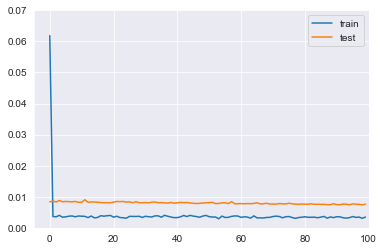

In [264]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.axis([-5, 100, 0, 0.07])
plt.legend() 
plt.show()

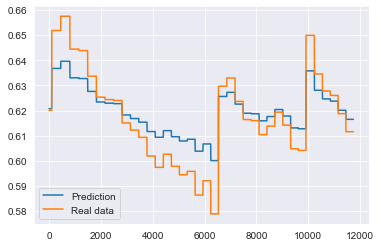

In [265]:
yhat = model.predict(testX)
tyhat = model.predict(trainX)
plt.plot(yhat, label='Prediction')
plt.plot(testY, label='Real data')
plt.legend()
plt.show()

In [266]:
print("Shape of train data :", trainX.shape)
print("Shape of prediction :", yhat.shape)
print("Shape of real data :", testY.shape)

Shape of train data : (11738, 1, 1)
Shape of prediction : (11738, 1)
Shape of real data : (11738,)


In [267]:
rmse = math.sqrt(mean_squared_error(testY, yhat))
mae = mean_absolute_error(testY, yhat)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 0.009
Test MAE: 0.008


## 4. Visualization

In [268]:
print("Shape of cycle :", np.shape(cycle))

cycle1 = cycle[0:train_size-1]
cycle2 = cycle[train_size+1:len(dataset)]

# cycle1 = cycle[0:train_size]
# cycle2 = cycle[train_size:len(dataset)]

print(np.shape(cycle1), np.shape(cycle2))

Shape of cycle : (23478,)
(11738,) (11738,)


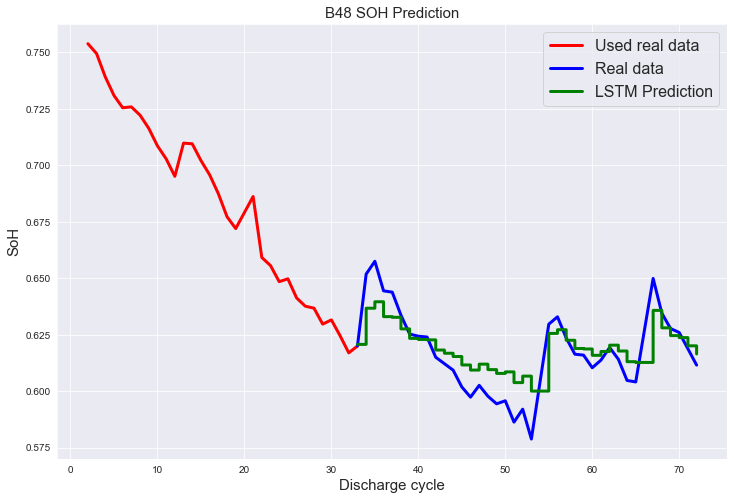

In [269]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))

plt.plot(cycle1, trainX[:,0],label='Used real data', linewidth = 3, color='r')
plt.plot(cycle2, testY,label='Real data', linewidth = 3, color='b')
# plt.plot(cycle2, yhat[:,0],label='LSTM Prediction', linewidth = 3, color='g')
plt.plot(cycle2, yhat[:,0],label='LSTM Prediction', linewidth = 3, color='g')
plt.legend(prop={'size': 16})

plt.ylabel('SoH', fontsize = 15)
plt.xlabel('Discharge cycle', fontsize = 15)
plt.title(str(num[7]) + " SOH Prediction", fontsize = 15)
plt.savefig('50%/fig/' + str(num[7]) + '_LSTM.jpg')
plt.show()